<a href="https://colab.research.google.com/github/agape1225/BITCOIN-AUTO-TRADE/blob/main/BITCOIN_AUTO_TRADE_%EB%8B%A4%EC%B0%A8%EC%9B%90_%ED%95%99%EC%8A%B5_%EB%B0%8F_%EB%8B%A4%EC%B0%A8%EC%9B%90_%EA%B2%B0%EA%B3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

In [84]:
# 데이터 불러오기
maindf = pd.read_csv('BTC_KRW.csv')
maindf = maindf.iloc[::-1]

# 필요한 열 선택
closedf = maindf[['시가', '종가', '고가', '저가', '거래량']]

# 데이터 전처리
closedf['종가'] = closedf['종가'].str.replace(',', '').astype(float)
closedf['시가'] = closedf['시가'].str.replace(',', '').astype(float)
closedf['고가'] = closedf['고가'].str.replace(',', '').astype(float)
closedf['저가'] = closedf['저가'].str.replace(',', '').astype(float)
closedf['거래량'] = closedf['거래량'].str.replace('K', '').astype(float)

<ipython-input-84-4078aebaaefa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closedf['종가'] = closedf['종가'].str.replace(',', '').astype(float)
<ipython-input-84-4078aebaaefa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closedf['시가'] = closedf['시가'].str.replace(',', '').astype(float)
<ipython-input-84-4078aebaaefa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [85]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(closedf)

# 데이터 분할
training_size = int(len(closedf) * 0.60)
test_size = len(closedf) - training_size
train_data, test_data = closedf[0:training_size, :], closedf[training_size:len(closedf), :]

In [86]:
# 시계열 데이터셋 생성 함수
def create_dataset(dataset, time_step=1, target_num=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - target_num):
        a = dataset[i:(i+time_step), :]
        b = dataset[i + time_step : i + time_step + target_num, 1]

        dataX.append(a)
        dataY.append(b)

        print(a)
        print(b)

    return np.array(dataX), np.array(dataY)

# 시계열 데이터셋 생성
time_step = 60
target_num = 10
X_train, y_train = create_dataset(train_data, time_step, target_num)
X_test, y_test = create_dataset(test_data, time_step, target_num)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.02687569 0.02493347 0.02549257 0.03014832 0.03354281]
 [0.0248578  0.02625771 0.0249061  0.03011002 0.02995185]
 [0.02619465 0.02504698 0.02455672 0.02984198 0.03558312]
 [0.02504698 0.02618204 0.02453176 0.02982922 0.02627928]
 [0.0262451  0.0268883  0.02528044 0.03119496 0.03142088]
 [0.02697658 0.02609376 0.02536779 0.03138641 0.12535706]
 [0.0261442  0.02643427 0.02495602 0.03118219 0.15661471]
 [0.02643427 0.02628293 0.02520558 0.03162893 0.20288909]
 [0.02628293 0.02915842 0.0276887  0.03151405 0.18248592]
 [0.02915842 0.02886835 0.02827517 0.03169275 0.17701787]
 [0.02885573 0.02869178 0.02793826 0.03331376 0.16142985]
 [0.02869178 0.02827559 0.02711471 0.03340311 0.13580348]
 [0.02830082 0.02365968 0.02684019 0.02894851 0.05794499]
 [0.02365968 0.02392453 0.02274741 0.02868047 0.03860279]
 [0.02392453 0.02371013 0.02239802 0.02871876 0.01942381]
 [0.02372274 0.02208321 0.02228572 0.02734026 0.02587122]
 [0.02208321 0.02377319 0.02263511 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.32257129 0.32075519 0.31785229 0.32838945 0.0019587 ]
 [0.32075519 0.31871209 0.31760273 0.32648763 0.00489676]
 [0.31871209 0.32007416 0.3167667  0.32316902 0.00318289]
 [0.32007416 0.32032639 0.31628006 0.32854262 0.00089774]
 [0.320339   0.32513148 0.32172047 0.32780231 0.00432547]
 [0.32513148 0.32238211 0.32103418 0.32947438 0.00269322]
 [0.32238211 0.33108423 0.33100411 0.32943609 0.0135477 ]
 [0.33108423 0.33895398 0.33807914 0.33992801 0.00587611]
 [0.33892876 0.33243369 0.33507194 0.34066832 0.00563127]
 [0.33243369 0.33707483 0.33482238 0.33875373 0.00489676]
 [0.33706221 0.3392945  0.33862817 0.34590151 0.0077532 ]
 [0.33938278 0.33737751 0.33710585 0.34590151 0.00293806]
 [0.33746579 0.33515784 0.33547123 0.34105123 0.00220354]
 [0.33491821 0.33489299 0.33142836 0.34260843 0.00326451]
 [0.33482993 0.33366965 0.33648195 0.34143415 0.00914062]
 [0.33366965 0.33451464 0.33116632 0.34047686 0.00334612]
 [0.33451464 0.34288885 0.34109881 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [89]:
# 데이터의 차원을 3차원으로 변경
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [88]:
# LSTM 모델 정의 및 학습
model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2]), activation="tanh"))
model.add(Dense(10))
model.compile(loss="mean_squared_error", optimizer="adam")

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, verbose=1)

Epoch 1/200
21/21 [==============================] - 3s 27ms/step - loss: 0.0106 - val_loss: 0.0965
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0530
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0305
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0203
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0159
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0124
Epoch 7/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0109
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 9.0690e-04 - val_loss: 0.0118
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 8.6071e-04 - val_loss: 0.0111
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 8.3021e-04 - val_loss: 0.0

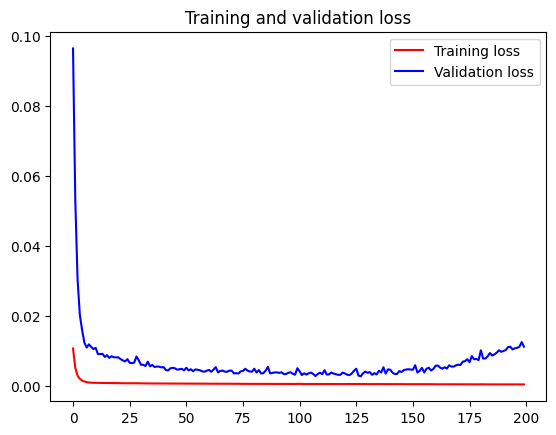

In [90]:
# 학습 과정 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [67]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#print(X_train.shape)
X_train.shape, X_test.shape, train_predict.shape, test_predict.shape

27/27 [==============================] - 0s 3ms/step


((1308, 60, 5), (850, 60, 5), (1308, 1), (850, 1))

In [68]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))
#print(test_predict)

ValueError: non-broadcastable output operand with shape (1308,1) doesn't match the broadcast shape (1308,5)

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

In [ ]:
model.save("BITCOIN_MODEL_VER2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive

drive.mount('/content/drive')  # mounts the drive

Mounted at /content/drive
